In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [13]:
f1 = pd.read_csv('complete.csv')

In [14]:
f1.head()

,resultId,raceId,driverId,constructorId,statusId,qualifyId,year,round,circuitId,race_name,...,positionOrder,points,laps,result_time,result_milliseconds,fastestLap,fastestLapTime,rank,status,avg_lap_position
0,1,18,1,1,1,1.0,2008,1,1,Australian Grand Prix,...,1,10.0,58,1:34:50.616,5690616.0,39,1:27.452,2,Finished,1.258621
1,2,18,2,2,1,5.0,2008,1,1,Australian Grand Prix,...,2,8.0,58,+5.478,5696094.0,41,1:27.739,3,Finished,3.655172
2,3,18,3,3,1,7.0,2008,1,1,Australian Grand Prix,...,3,6.0,58,+8.163,5698779.0,41,1:28.090,5,Finished,4.206897
3,4,18,4,4,1,12.0,2008,1,1,Australian Grand Prix,...,4,5.0,58,+17.181,5707797.0,58,1:28.603,7,Finished,7.982759
4,5,18,5,1,1,3.0,2008,1,1,Australian Grand Prix,...,5,4.0,58,+18.014,5708630.0,43,1:27.418,1,Finished,2.965517


In [15]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               26759 non-null  int64  
 1   raceId                 26759 non-null  int64  
 2   driverId               26759 non-null  int64  
 3   constructorId          26759 non-null  int64  
 4   statusId               26759 non-null  int64  
 5   qualifyId              10494 non-null  float64
 6   year                   26759 non-null  int64  
 7   round                  26759 non-null  int64  
 8   circuitId              26759 non-null  int64  
 9   race_name              26759 non-null  object 
 10  date                   26759 non-null  object 
 11  driverRef              26759 non-null  object 
 12  forename               26759 non-null  object 
 13  surname                26759 non-null  object 
 14  nationality_x          26759 non-null  object 
 15  co

In [17]:
X = f1.drop('points',axis=1) 

In [18]:
X= X.select_dtypes(exclude=['object'])

In [19]:
X = X.drop(['qualifyId', 'qualifying_car_number'], axis=1)

In [20]:
X.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
statusId               0
year                   0
round                  0
circuitId              0
car_number             0
grid                   0
final_position         0
positionOrder          0
laps                   0
result_milliseconds    0
fastestLap             0
rank                   0
avg_lap_position       0
dtype: int64

In [21]:
y = f1['points'] 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2529)

In [23]:
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict on test data
y_pred = reg_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
mea = mean_absolute_error(y_test, y_pred)

In [37]:
print(f"Mean Absolute Error: {mea}")

Mean Absolute Error: 0.028029166666666668


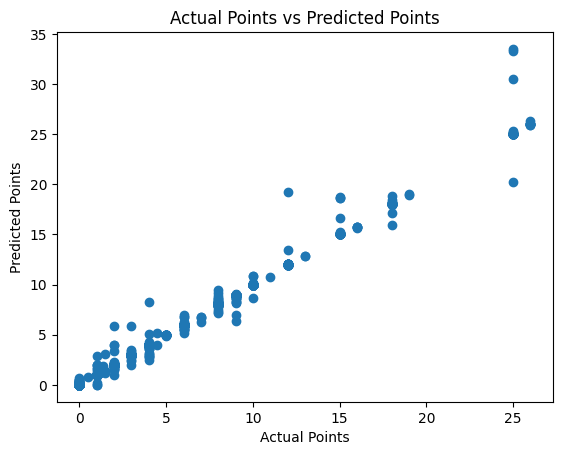

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual Points vs Predicted Points")
plt.show()